## Import Required Libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer

In [2]:
# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

## Load the Dataset

In [3]:
data = pd.read_csv('netflix1.csv')
data.shape

(8790, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [6]:
data.nunique()

show_id         8790
type               2
title           8787
director        4528
country           86
date_added      1713
release_year      74
rating            14
duration         220
listed_in        513
dtype: int64

In [7]:
data['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [8]:
# data['country'].value_counts().index.tolist()
data['country'].value_counts().index.sort_values(ascending=True)

Index(['Argentina', 'Australia', 'Austria', 'Bangladesh', 'Belarus', 'Belgium',
       'Brazil', 'Bulgaria', 'Cambodia', 'Cameroon', 'Canada', 'Chile',
       'China', 'Colombia', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Egypt', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kenya', 'Kuwait', 'Lebanon', 'Luxembourg', 'Malaysia', 'Mauritius',
       'Mexico', 'Mozambique', 'Namibia', 'Netherlands', 'New Zealand',
       'Nigeria', 'Norway', 'Not Given', 'Pakistan', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Romania', 'Russia',
       'Saudi Arabia', 'Senegal', 'Serbia', 'Singapore', 'Slovenia', 'Somalia',
       'South Africa', 'South Korea', 'Soviet Union', 'Spain', 'Sweden',
       'Switzerland', 'Syria', 'Taiwan', 'Thailand', 'Turkey', 'Ukraine',
       'Unit

In [9]:
data['release_year'].value_counts().index.sort_values(ascending=True)

Index([1925, 1942, 1943, 1944, 1945, 1946, 1947, 1954, 1955, 1956, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021],
      dtype='int64', name='release_year')

In [10]:
data['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [11]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

## Drop duplicates if any

In [12]:
print(data.shape)
print(data.drop_duplicates().shape)

(8790, 10)
(8790, 10)


In [13]:
# No duplicates so no need to run commands: 
# data.drop_duplicates(inplace=True)

## Drop rows with missing critical information

In [14]:
print(data.shape)
print(data.dropna(subset=['director', 'country']).shape)

(8790, 10)
(8790, 10)


In [15]:
# No missing values in columns/features ['director', 'country'] so no need to run commands: 
# data.dropna(subset=['director', 'cast', 'country'], inplace=True)

## Convert 'date_added' to datetime

In [16]:
data['date_added'].dtypes

dtype('O')

In [17]:
data['date_added'].head()

0    9/25/2021
1    9/24/2021
2    9/24/2021
3    9/22/2021
4    9/24/2021
Name: date_added, dtype: object

In [18]:
data['date_added'] = pd.to_datetime(data['date_added'])

In [19]:
data['date_added'].dtypes

dtype('<M8[ns]')

In [20]:
data['date_added'].head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-22
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [21]:
data.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

## Content Type Distribution (Movies vs. TV Shows)

In [22]:
type_counts = data['type'].value_counts()
type_counts

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

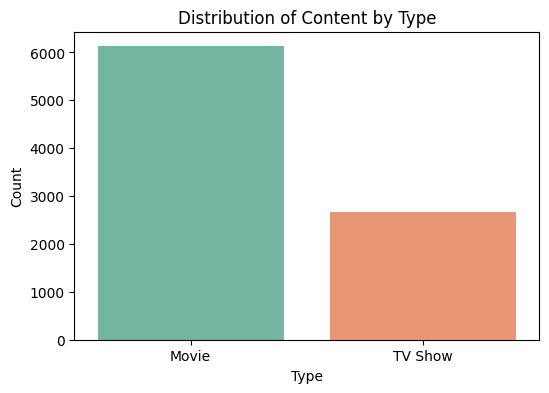

In [23]:
plt.figure(figsize=(6, 4))
sns.barplot(x=type_counts.index, y=type_counts.values, hue=type_counts.index, palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

Text(0.5, 0.98, 'Total Content on Netflix')

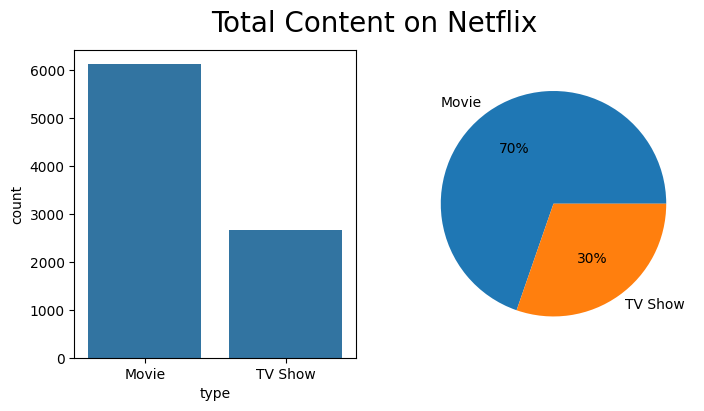

In [130]:
fig, axes = plt.subplots(1,2, figsize=(8, 4))
sns.countplot(data, x=data['type'], ax=axes[0])
plt.pie(type_counts, labels=['Movie', 'TV Show'], autopct='%.0f%%')
plt.suptitle('Total Content on Netflix', fontsize=20)

## Most Common Genres

In [24]:
data.head(3).T

,0,1,2
show_id,s1,s3,s6
type,Movie,TV Show,TV Show
title,Dick Johnson Is Dead,Ganglands,Midnight Mass
director,Kirsten Johnson,Julien Leclercq,Mike Flanagan
country,United States,France,United States
date_added,2021-09-25 00:00:00,2021-09-24 00:00:00,2021-09-24 00:00:00
release_year,2020,2021,2021
rating,PG-13,TV-MA,TV-MA
duration,90 min,1 Season,1 Season
listed_in,Documentaries,"Crime TV Shows, International TV Shows, TV Act...","TV Dramas, TV Horror, TV Mysteries"


In [25]:
data['genres'] = data['listed_in'].apply(lambda x: x.split(','))

In [26]:
data.head(3).T

,0,1,2
show_id,s1,s3,s6
type,Movie,TV Show,TV Show
title,Dick Johnson Is Dead,Ganglands,Midnight Mass
director,Kirsten Johnson,Julien Leclercq,Mike Flanagan
country,United States,France,United States
date_added,2021-09-25 00:00:00,2021-09-24 00:00:00,2021-09-24 00:00:00
release_year,2020,2021,2021
rating,PG-13,TV-MA,TV-MA
duration,90 min,1 Season,1 Season
listed_in,Documentaries,"Crime TV Shows, International TV Shows, TV Act...","TV Dramas, TV Horror, TV Mysteries"


In [30]:
print(data['listed_in'][1])
print(data['genres'][1])

Crime TV Shows, International TV Shows, TV Action & Adventure
['Crime TV Shows', ' International TV Shows', ' TV Action & Adventure']


In [31]:
# Below code will concatenate all individual lists of column "genres" and will make a single flat list "all_genres"
# sum(iterable, start=0)
# iterable ≈ list, tuple etc.
# [] is empty list i.e. mutable sequence
# here start is []
# The sum() function, instead of performing arithmetic addition, ¬
# will start with the start value i.e. an empty list and then use the + operator to concatenate the elements of the iterable to it.

all_genres = sum(data['genres'], [])

In [32]:
len(all_genres)

19294

In [37]:
print(data['genres'][0])
print(data['genres'][1])
print(data['genres'][2])

['Documentaries']
['Crime TV Shows', ' International TV Shows', ' TV Action & Adventure']
['TV Dramas', ' TV Horror', ' TV Mysteries']


In [35]:
all_genres[0:10]

['Documentaries',
 'Crime TV Shows',
 ' International TV Shows',
 ' TV Action & Adventure',
 'TV Dramas',
 ' TV Horror',
 ' TV Mysteries',
 'Children & Family Movies',
 ' Comedies',
 'Dramas']

In [42]:
# Another method for " sum(data['genres'], []) "
# itertools.chain.from_iterable()

# import itertools
# all_genres_flattened = list(itertools.chain.from_iterable(data['genres']))
# print(len(all_genres_flattened))
# print()
# print( all_genres_flattened[:10] )

# Outputs:

# 19294

# ['Documentaries', 'Crime TV Shows', ' International TV Shows', ' TV Action & Adventure', 'TV Dramas', ' TV Horror', ' TV Mysteries', 'Children & Family Movies', ' Comedies', 'Dramas']

In [43]:
genre_counts = pd.Series(all_genres).value_counts().head(10)
genre_counts

 International Movies     2624
Dramas                    1599
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     773
 Independent Movies        736
 TV Dramas                 695
 Romantic Movies           613
Name: count, dtype: int64

In [44]:
genre_counts.index = genre_counts.index.str.strip()
print(genre_counts.head(10))

International Movies      2624
Dramas                    1599
Comedies                  1210
Action & Adventure         859
Documentaries              829
Dramas                     827
International TV Shows     773
Independent Movies         736
TV Dramas                  695
Romantic Movies            613
Name: count, dtype: int64


In [47]:
cleaned_genres = [genre.strip() for genre in all_genres]
print(len(cleaned_genres))
print()
genre_counts = pd.Series(cleaned_genres).value_counts().head(10)
genre_counts

19294



International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

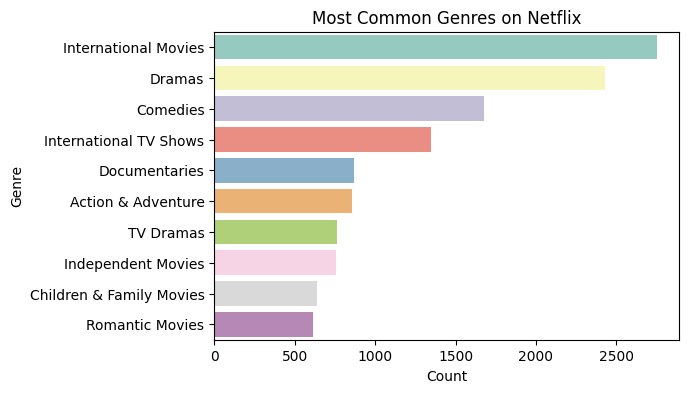

In [48]:
plt.figure(figsize=(6, 4))
sns.barplot(x=genre_counts.values, y=genre_counts.index, hue=genre_counts.index, palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [161]:
data[['type', 'listed_in']].head()

,type,listed_in
0,Movie,Documentaries
1,TV Show,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,"Children & Family Movies, Comedies"
4,Movie,"Dramas, Independent Movies, International Movies"


In [162]:
popular_movie_genre = data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_series_genre = data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]

In [163]:
popular_movie_genre

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Comedies, International Movies                      176
dtype: int64

In [164]:
popular_series_genre

listed_in
Kids' TV                                                  219
International TV Shows, TV Dramas                         121
Crime TV Shows, International TV Shows, TV Dramas         110
Kids' TV, TV Comedies                                      97
Reality TV                                                 95
International TV Shows, Romantic TV Shows, TV Comedies     94
International TV Shows, Romantic TV Shows, TV Dramas       90
Anime Series, International TV Shows                       87
Docuseries                                                 84
TV Comedies                                                68
dtype: int64

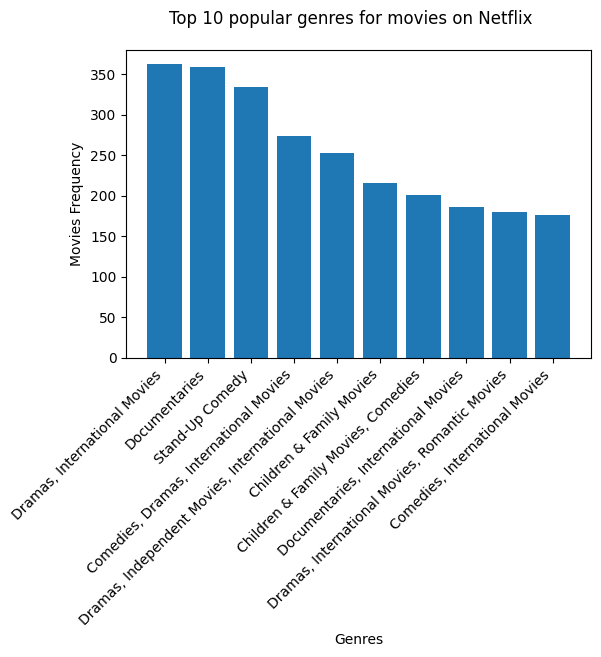

In [169]:
plt.figure(figsize=(6, 4))
plt.bar(popular_movie_genre.index, popular_movie_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()

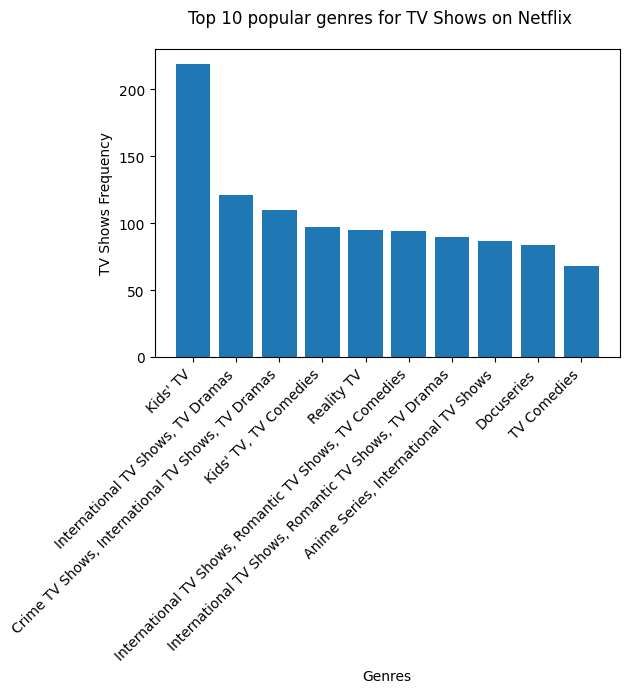

In [170]:
plt.figure(figsize=(6, 4))
plt.bar(popular_series_genre.index, popular_series_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("TV Shows Frequency")
plt.suptitle("Top 10 popular genres for TV Shows on Netflix")
plt.show()

## Content Added Over Time

In [49]:
data['date_added'].head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-22
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [143]:
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month
data['day_added'] = data['date_added'].dt.day

In [51]:
data[['date_added', 'year_added', 'month_added']].head()

,date_added,year_added,month_added
0,2021-09-25,2021,9
1,2021-09-24,2021,9
2,2021-09-24,2021,9
3,2021-09-22,2021,9
4,2021-09-24,2021,9


In [52]:
data[['date_added', 'year_added', 'month_added']].dtypes

date_added     datetime64[ns]
year_added              int32
month_added             int32
dtype: object

In [58]:
# data['year_added'].value_counts().sort_values(ascending=True)
data['year_added'].value_counts().sort_index(ascending=True)

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     426
2017    1185
2018    1648
2019    2016
2020    1879
2021    1498
Name: count, dtype: int64

In [59]:
data['month_added'].value_counts().sort_index(ascending=True)

month_added
1     737
2     562
3     741
4     763
5     632
6     728
7     827
8     754
9     769
10    760
11    705
12    812
Name: count, dtype: int64

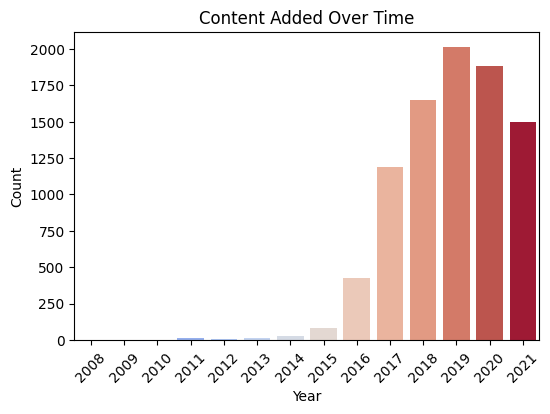

In [60]:
plt.figure(figsize=(6, 4))
sns.countplot(x='year_added', data=data, palette='coolwarm', hue='year_added', legend=False)
plt.title('Content Added Over Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

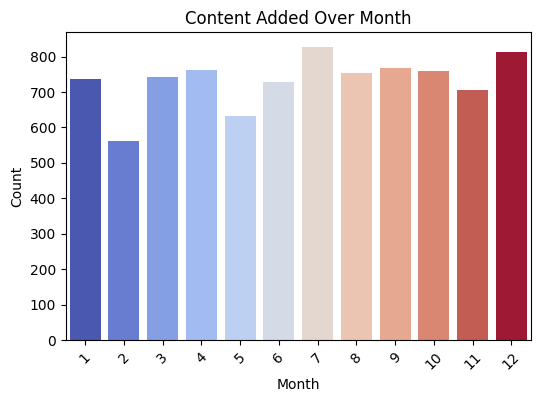

In [61]:
plt.figure(figsize=(6, 4))
sns.countplot(x='month_added', data=data, palette='coolwarm', hue='month_added', legend=False)
plt.title('Content Added Over Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Top 10 Directors with the Most Titles

In [62]:
data['director'].head()

0    Kirsten Johnson
1    Julien Leclercq
2      Mike Flanagan
3      Bruno Garotti
4       Haile Gerima
Name: director, dtype: object

In [67]:
# top_directors = top_directors.drop('Not Given')
top_directors = data['director'].value_counts().head(11)
top_directors = top_directors[top_directors.index != 'Not Given']
top_directors

director
Rajiv Chilaka             20
Alastair Fothergill       18
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Name: count, dtype: int64

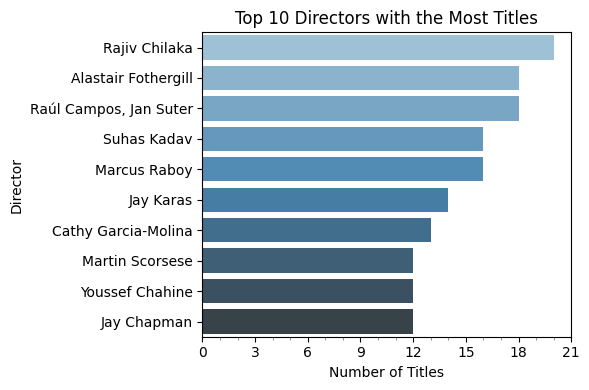

In [70]:
plt.figure(figsize=(6, 4))
sns.barplot(x=top_directors.values, y=top_directors.index, hue=top_directors.index, palette='Blues_d')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')

# Define the desired major tick positions
major_ticks = np.arange(0, 22, 3)
plt.xticks(major_ticks)

# Enable minor ticks and set their spacing
ax = plt.gca()
ax.xaxis.set_minor_locator(plt.FixedLocator(np.arange(1, 21, 1))) # Minor ticks at every integer
ax.tick_params(axis='x', which='minor', length=2, color='gray')

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

plt.show()

In [174]:
directors = data['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]
directors[:5]

,director,count
1,Rajiv Chilaka,20
2,Alastair Fothergill,18
3,"Raúl Campos, Jan Suter",18
4,Suhas Kadav,16
5,Marcus Raboy,16


In [175]:
len(directors['director'])

14

In [176]:
max(directors['count'])

20

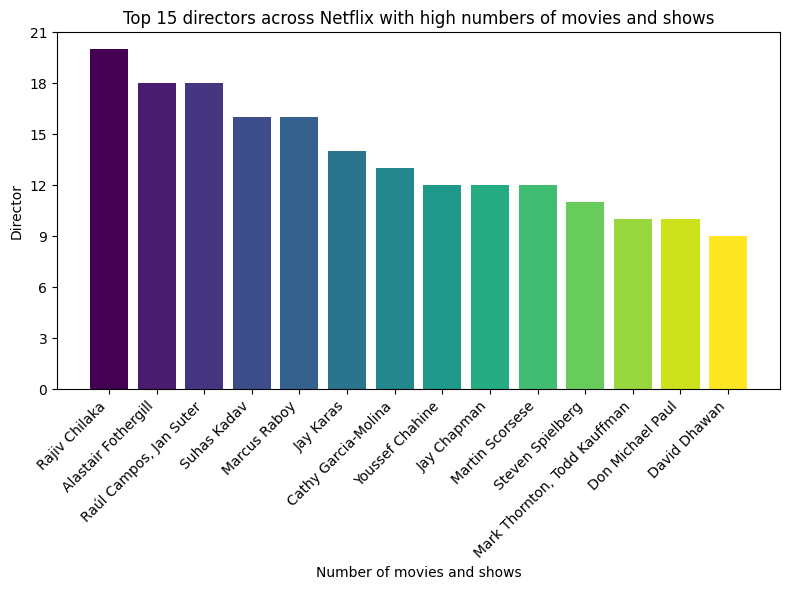

In [177]:
plt.figure(figsize=(8, 6))

# Generate a sequence of colors from a colormap
num_bars = len(directors['director'])
colors = plt.cm.viridis(np.linspace(0, 1, num_bars))  # Use 'viridis' colormap

plt.bar(directors['director'], directors['count'], color=colors)
plt.title('Top 15 directors across Netflix with high numbers of movies and shows')
plt.xlabel('Number of movies and shows')
plt.ylabel('Director')
plt.xticks(rotation=45, ha='right')

# Adjust major ticks based on data
major_ticks = np.arange(0, max(directors['count']) + 3, 3)
plt.yticks(major_ticks)

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

plt.show()

## Word Cloud of Movie Titles

In [112]:
data[['title', 'type']].head()

,title,type
0,Dick Johnson Is Dead,Movie
1,Ganglands,TV Show
2,Midnight Mass,TV Show
3,Confessions of an Invisible Girl,Movie
4,Sankofa,Movie


In [113]:
movie_titles = data[data['type'] == 'Movie']['title']
movie_titles.shape

(6126,)

In [114]:
movie_titles.head()

0                Dick Johnson Is Dead
3    Confessions of an Invisible Girl
4                             Sankofa
6                        The Starling
7     Motu Patlu in the Game of Zones
Name: title, dtype: object

In [115]:
joint_str_titles = ' '.join(movie_titles)
joint_str_titles[0:100]

'Dick Johnson Is Dead Confessions of an Invisible Girl Sankofa The Starling Motu Patlu in the Game of'

In [116]:
len(joint_str_titles)

116502

In [117]:
word_count_titles = len(joint_str_titles.split())
word_count_titles

19523

In [118]:
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(joint_str_titles)
wordcloud

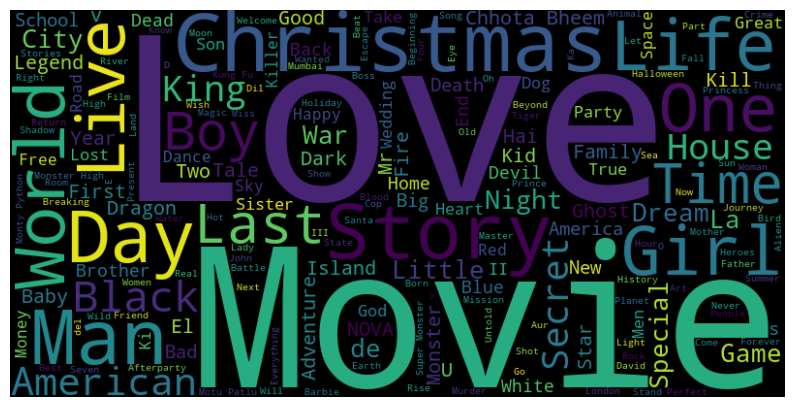

In [119]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [90]:
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
except Exception as e:
    print(f"An error occurred during stopwords download: {e}")
    
# ==============================================================

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

# ==============================================================

def text_preprocessing_with_stopwords(text):
    # 1. Clean the text
    cleaned_text = clean_text(text)

    # 2. Tokenize the cleaned text
    # Using word_tokenize (splits on whitespace and punctuation)
    # tokenized_text = word_tokenize(cleaned_text)

    # Using RegexpTokenizer (splits based on a regular expression - only alphanumeric)
    tokenizer = RegexpTokenizer(r'\w+')
    tokenized_text = tokenizer.tokenize(cleaned_text)

    # 3. Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokenized_text if word not in stop_words]

    # 4. (Optional) Join the filtered tokens back into a string
    combined_text = ' '.join(filtered_tokens)

    return filtered_tokens, combined_text # Returning the list of tokens

# ==============================================================

def count_unique_words(text):
    """Counts the occurrences of each unique word in a string."""
    words = text.lower().split()  # Convert to lowercase and split into words
    word_counts = {}
    for word in words:
        # Remove punctuation from the word (optional but recommended)
        cleaned_word = ''.join(char for char in word if char.isalnum())
        if cleaned_word:  # Only count non-empty cleaned words
            word_counts[cleaned_word] = word_counts.get(cleaned_word, 0) + 1
    return word_counts

In [120]:
processed_tokens_list, processed_tokens_list_flattened_string = text_preprocessing_with_stopwords(joint_str_titles)

In [121]:
unique_word_counts = count_unique_words(processed_tokens_list_flattened_string)
sorted_unique_word_counts = sorted(unique_word_counts.items(), key=lambda item: item[1], reverse=True)

In [105]:
# Another method for: sorted(unique_word_counts.items(), key=lambda item: item[1], reverse=True)

# import operator
# sorted_unique_word_counts_II = sorted(unique_word_counts.items(), key=operator.itemgetter(1), reverse=True)
# print(len(sorted_unique_word_counts_II))
# print()
# print(sorted_unique_word_counts_II[:10])

# Output:

# 6999

# [('love', 105), ('movie', 72), ('christmas', 72), ('man', 65), ('story', 62), ('life', 51), ('world', 48), ('little', 44), ('one', 44), ('last', 42)]

In [122]:
len(processed_tokens_list_flattened_string)

96266

In [123]:
processed_tokens_list_flattened_string[0:100]

'dick johnson dead confessions invisible girl sankofa starling motu patlu game zones je suis karl mot'

In [124]:
print(type(unique_word_counts))
print(len(unique_word_counts))

<class 'dict'>
6999


In [125]:
# slicing is not supported in dictionary. Dictionary is inherently unordered in python.
list(unique_word_counts.items())[:10]

[('dick', 4),
 ('johnson', 3),
 ('dead', 17),
 ('confessions', 1),
 ('invisible', 5),
 ('girl', 33),
 ('sankofa', 1),
 ('starling', 1),
 ('motu', 13),
 ('patlu', 13)]

In [126]:
sorted_unique_word_counts[0:10]

[('love', 105),
 ('movie', 72),
 ('christmas', 72),
 ('man', 65),
 ('story', 62),
 ('life', 51),
 ('world', 48),
 ('little', 44),
 ('one', 44),
 ('last', 42)]

In [127]:
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(processed_tokens_list_flattened_string)
wordcloud

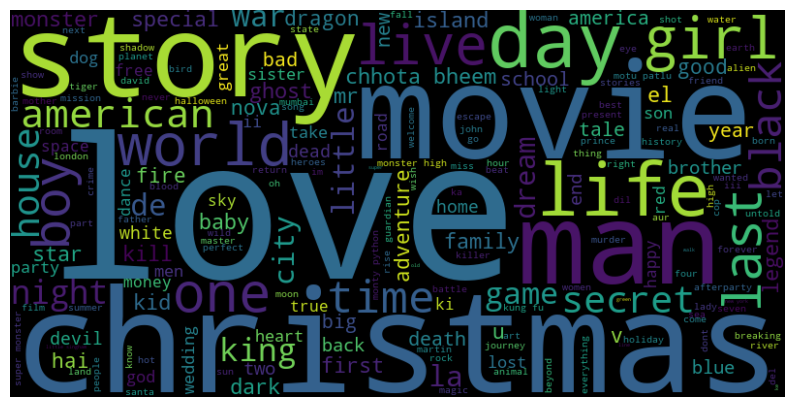

In [128]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Rating on Netflix

In [131]:
data['rating'].head()

0    PG-13
1    TV-MA
2    TV-MA
3    TV-PG
4    TV-MA
Name: rating, dtype: object

In [133]:
data['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [134]:
data['rating'].value_counts().reset_index()

,rating,count
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


In [132]:
ratings = data['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)
ratings

,rating,count
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


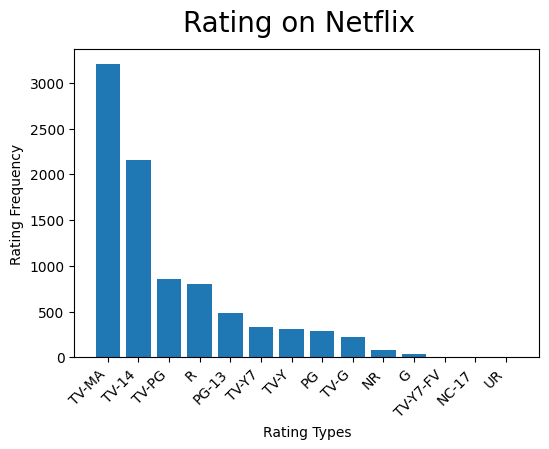

In [137]:
plt.figure(figsize=(6, 4))
plt.bar(ratings['rating'], ratings['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.suptitle('Rating on Netflix', fontsize=20)
plt.show()

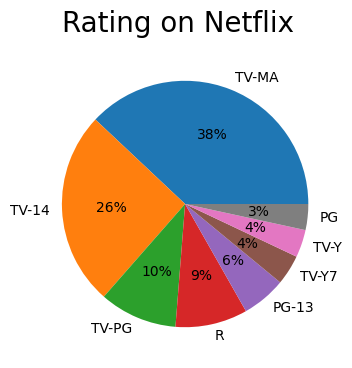

In [138]:
plt.figure(figsize=(6, 4))
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8], autopct='%.0f%%')
plt.suptitle('Rating on Netflix', fontsize=20)
plt.show()

## Top 10 countries with most content on Netflix

In [139]:
data['country'].head()

0    United States
1           France
2    United States
3           Brazil
4    United States
Name: country, dtype: object

In [140]:
top_ten_countries = data['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]
top_ten_countries

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


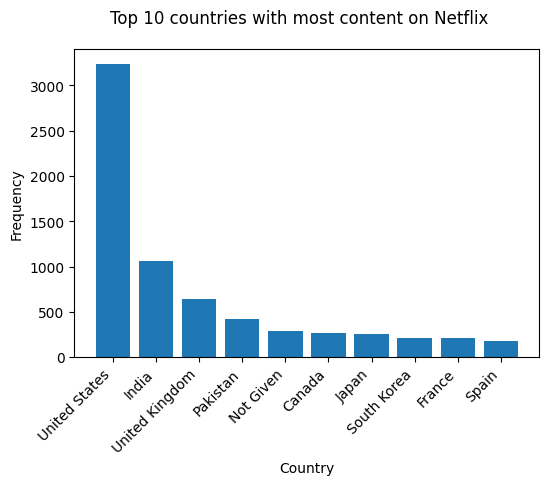

In [141]:
plt.figure(figsize=(6, 4))
plt.bar(top_ten_countries['country'], top_ten_countries['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("Top 10 countries with most content on Netflix")
plt.show()

## Monthly and Yearly Releases of Movies and TV shows on Netflix

In [145]:
data[['date_added','year_added','month_added','day_added']].head()

,date_added,year_added,month_added,day_added
0,2021-09-25,2021,9,25
1,2021-09-24,2021,9,24
2,2021-09-24,2021,9,24
3,2021-09-22,2021,9,22
4,2021-09-24,2021,9,24


In [146]:
data[['date_added','year_added','month_added','day_added']].dtypes

date_added     datetime64[ns]
year_added              int32
month_added             int32
day_added               int32
dtype: object

In [153]:
monthly_movie_release = data[data['type']=='Movie']['month_added'].value_counts().sort_index()
monthly_series_release = data[data['type']=='TV Show']['month_added'].value_counts().sort_index()

In [154]:
monthly_movie_release

month_added
1     545
2     382
3     528
4     549
5     439
6     492
7     565
8     518
9     518
10    545
11    498
12    547
Name: count, dtype: int64

In [155]:
monthly_series_release

month_added
1     192
2     180
3     213
4     214
5     193
6     236
7     262
8     236
9     251
10    215
11    207
12    265
Name: count, dtype: int64

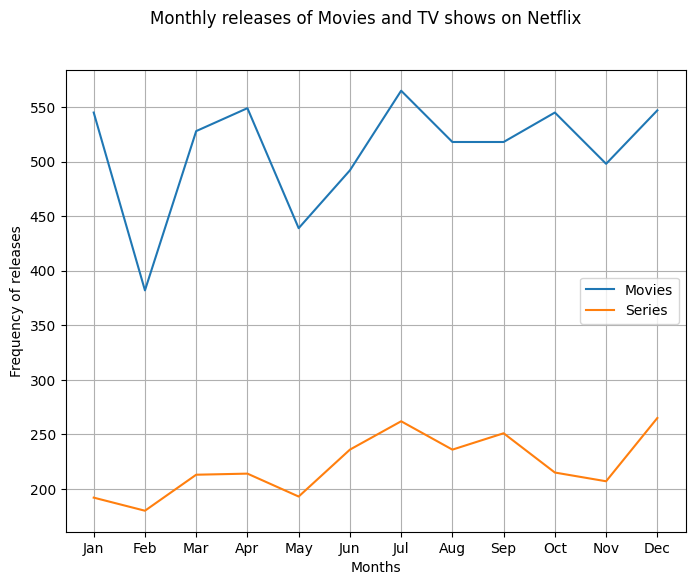

In [156]:
plt.figure(figsize=(8, 6))
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies')
plt.plot(monthly_series_release.index, monthly_series_release.values, label='Series')
plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.show()

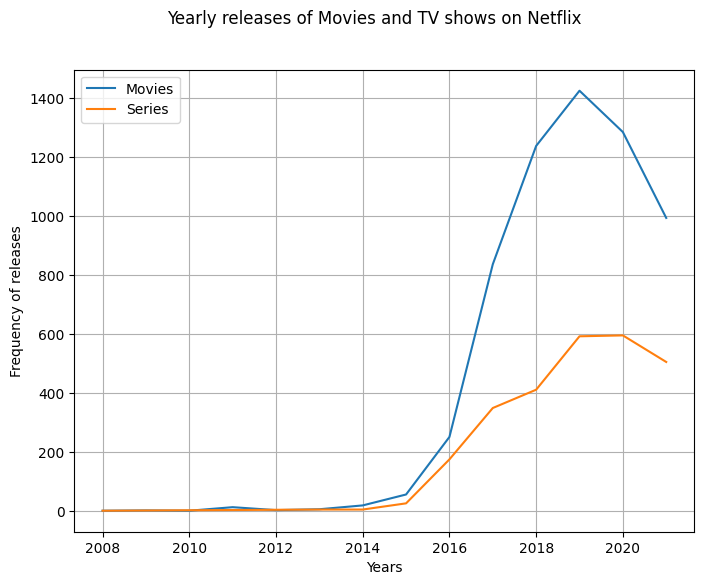

In [159]:
yearly_movie_release = data[data['type']=='Movie']['year_added'].value_counts().sort_index()
yearly_series_release = data[data['type']=='TV Show']['year_added'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.plot(yearly_movie_release.index, yearly_movie_release.values, label='Movies')
plt.plot(yearly_series_release.index, yearly_series_release.values, label='Series')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.legend()
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV shows on Netflix")
plt.show()

In [158]:
yearly_movie_release

year_added
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     251
2017     836
2018    1237
2019    1424
2020    1284
2021     993
Name: count, dtype: int64